# Build a decision tree

# Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.

In this activity, I'll work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 103.904 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In this activity, my goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience.

# Step 1: Imports

**Import packages**

In [1]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

Pandas is used to load the *airline-passenger-satisfaction/train.csv* dataset. The resulting pandas DataFrame is saved in a variable named *data*. 

In [2]:
data = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")

**Output the first 10 rows of data**

In [3]:
data.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


# Step 2: Data exploration, data cleaning, and model preparation

**Prepare the data**

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes:

* Exploring the data
* Checking for missing values
* Encoding the data
* Renaming a column
* Creating the training and testing data

**Explore the data**

Check the data type of each column. Note that decision trees expect numeric data.

In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
data.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

**Output unique values**

The Class column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the Class column.

In [6]:
unique_classes = data['Class'].unique()
print("Unique classes:", unique_classes)

Unique classes: ['Eco Plus' 'Business' 'Eco']


**Check the counts of the predicted labels**

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels.

In [7]:
# Assuming the target variable is named 'satisfaction'
satisfaction_counts = data['satisfaction'].value_counts(dropna=False)

print("Customer Satisfaction Counts:\n", satisfaction_counts)

Customer Satisfaction Counts:
 satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


In [8]:
satisfaction_counts_percentages = (satisfaction_counts / len(data)) * 100
print(satisfaction_counts_percentages)

satisfaction
neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: count, dtype: float64


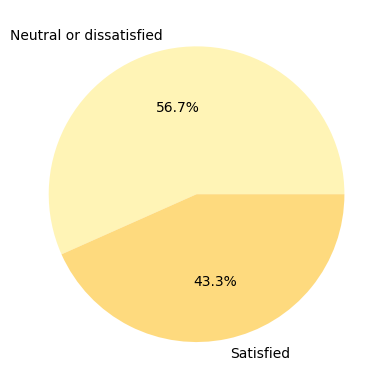

In [9]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

**Check for missing values**

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data.

In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310

**Check the number of rows and columns in the dataset**

In [11]:
data.shape

(103904, 25)

**Drop the rows with missing values**

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named data_subset.

In [12]:
data_subset = data.dropna(axis=0).reset_index(drop = True)

**Check for missing values**

Check that df_subset does not contain any missing values.

In [13]:
missing_values = data_subset.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: i

**Check the number of rows and columns in the dataset again**

Check how many rows and columns are remaining in the dataset.

In [14]:
data_subset.shape

(103594, 25)

**Encode the data**

Four columns (satisfaction, Customer Type, Type of Travel, Class) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal Class column into numeric.

In [15]:
unique_classes = data['Class'].unique()
print("Unique classes:", unique_classes)

Unique classes: ['Eco Plus' 'Business' 'Eco']


In [16]:
data_subset['Class'] = data_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1}) 

**Represent the data in the target variable numerically**

To represent the data in the target variable numerically, assign "satisfied" to the label 1 and "dissatisfied" to the label 0 in the satisfaction column.

In [17]:
data_subset['satisfaction'] = data_subset['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

**Convert categorical columns into numeric**

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [18]:
data_subset.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [19]:
data_subset = pd.get_dummies(data_subset, drop_first=True)

**Check column data types**

Now that you have converted categorical columns into numeric, check your column data types.

In [20]:
data_subset.dtypes

Unnamed: 0                             int64
id                                     int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                         float64
Gender_Mal

I will use the *Satisfaction* column to create the training and test data from random forest model. I need o check for *Nan* values in it

In [21]:
nan_count = data_subset['satisfaction'].isnull().sum()
print("Number of NaN values in satisfaction:", nan_count)

Number of NaN values in satisfaction: 58697


In [22]:
data_subset = data_subset.dropna(subset=['satisfaction'])

**Create the training and testing data**

Put 75% of the data into a training set and the remaining 25% into a testing set.

In [23]:
# Assuming your target variable is 'Customer Satisfaction'
X = data_subset.copy()
X = X.drop("satisfaction", axis = 1)

y = data_subset['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Step 3: Model building

**Fit a decision tree classifier model to the data**

Make a decision tree instance called *decision_tree* and pass in *0* to the *random_state* parameter. Fit the model on the training set, use the *predict()* function on the testing set, and assign those predictions to the variable *data_pred*.

In [24]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

data_pred = decision_tree.predict(X_test)

# Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [25]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, data_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, data_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, data_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, data_pred))

Decision Tree
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 Score: 1.000000


**Produce a confusion matrix**

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

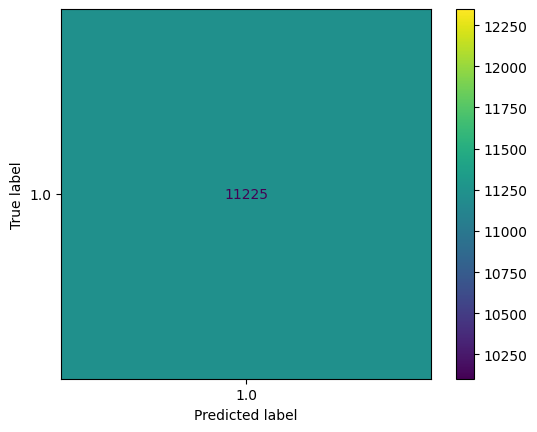

In [26]:
cm = metrics.confusion_matrix(y_test, data_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

**Plot the decision tree**

Examine the decision tree. Use *plot_tree* function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

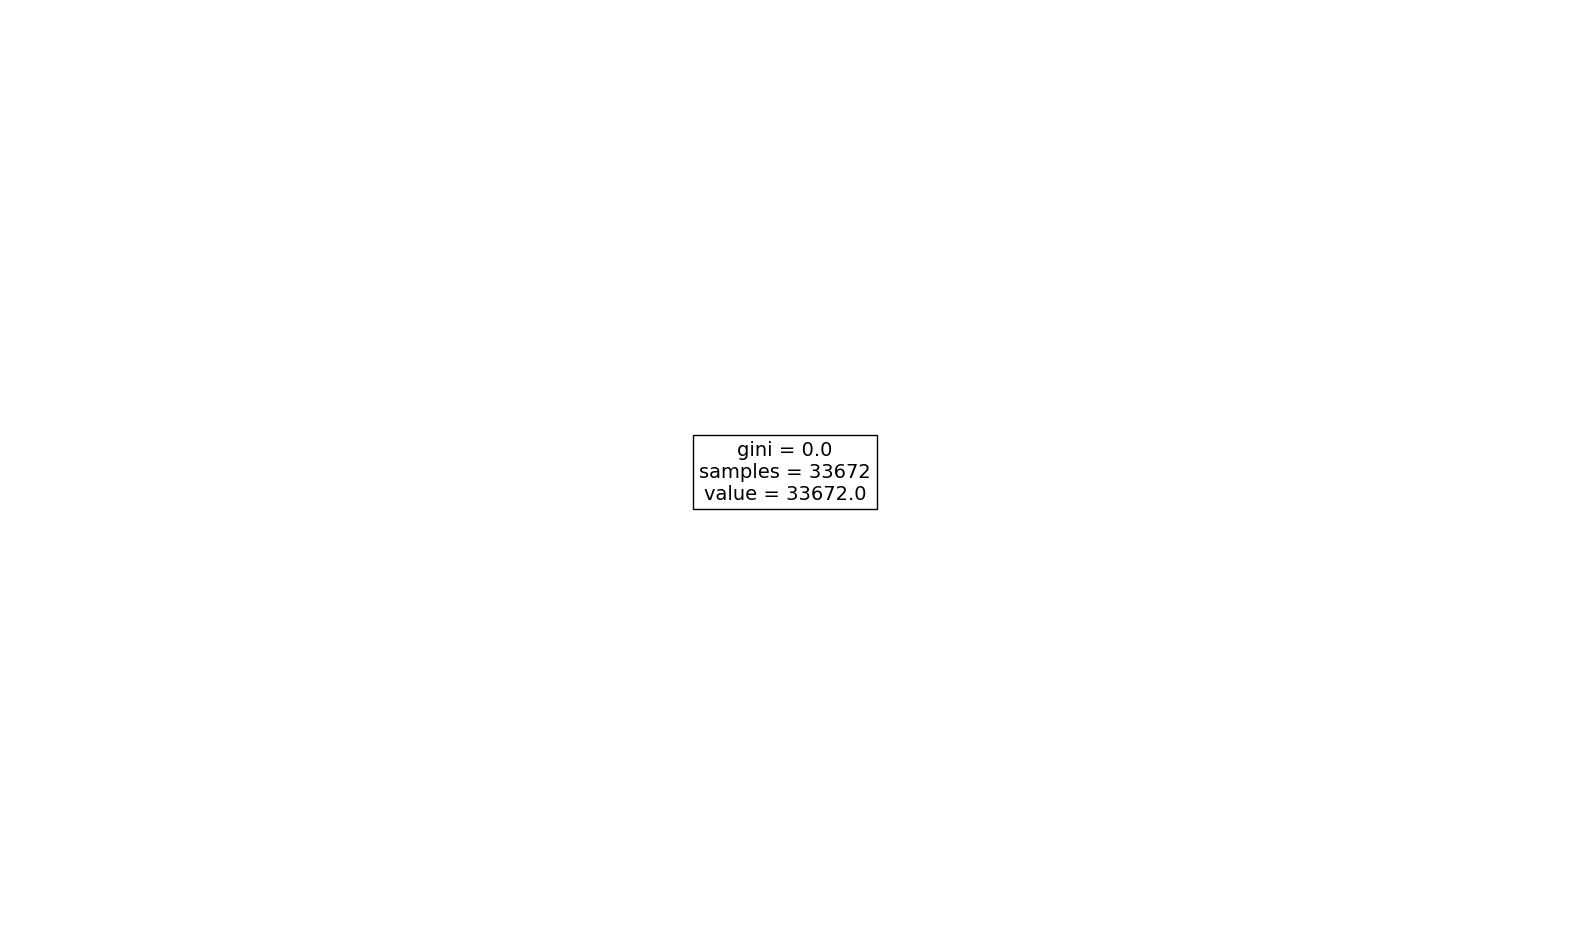

In [27]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);